In [6]:
import numpy as np
import matplotlib.pyplot as plt
from stochastic_glv_generator import glv, glv_jac, euler_maruyama
from numba import njit

In [7]:
@njit
def set_nb_seed(seed):
    np.random.seed(seed)

new matrix 5

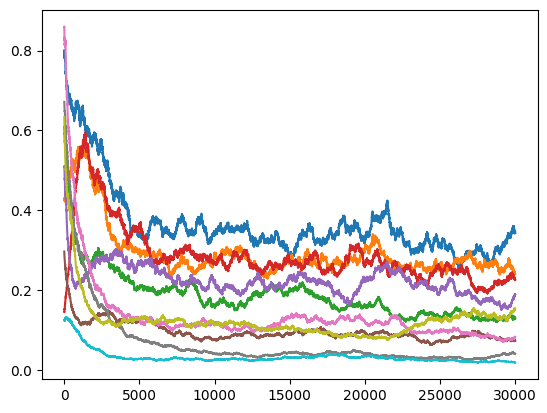

In [10]:
n = 10

np.random.seed(1)
r = np.random.uniform(0, 1, n)
A = np.random.normal(size=(n,n))
for i in range(n):
    A[i,i] = -np.abs(np.random.normal(10))

mat_c = 0
while (-np.linalg.inv(A)@r < 0).any() or (np.linalg.eig(-np.linalg.inv(A)@r.reshape((-1,1))*A)[0]>0).any():
    mat_c += 1
    print(f"\rnew matrix {mat_c}", end="")
    A = np.random.normal(0, size=(n,n))
    for i in range(n):
        A[i,i] = -np.abs(np.random.normal(3, 0.1))

p = np.concatenate((r, A.flatten()))
sig = 0.1 #np.random.uniform(0, 0.1, n)

x0 = np.random.uniform(0, 1, n)

dt = 1e-3
n_steps = 30000

#%%

x = np.zeros((n_steps, n))
t = 0.
set_nb_seed(12)

sol = euler_maruyama(glv, t, x0, p, sig, dt, n_steps)

plt.plot(sol)
plt.show()